In [2]:
import datasets.adience

importing Jupyter notebook from datasets/adience_test.ipynb


In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
from skimage.io import imread

In [39]:
from collections import Counter

In [4]:
Xt, yt, Xv, yv = datasets.adience.load_data(0, "/Users/cjb60/Desktop/lisa_tmp4_4/adience_data/aligned_256x256")

In [6]:
Xt.shape, yt.shape, Xv.shape, yv.shape

((9340,), (9340,), (4377,), (4377,))

In [12]:
Xt[0:5], yt[0:5]

(array([ '/Users/cjb60/Desktop/lisa_tmp4_4/adience_data/aligned_256x256/114841417@N06/landmark_aligned_face.481.12068804204_085d553238_o.jpg',
        '/Users/cjb60/Desktop/lisa_tmp4_4/adience_data/aligned_256x256/114841417@N06/landmark_aligned_face.482.12068804204_085d553238_o.jpg',
        '/Users/cjb60/Desktop/lisa_tmp4_4/adience_data/aligned_256x256/114841417@N06/landmark_aligned_face.483.12078357226_5fdd9367de_o.jpg',
        '/Users/cjb60/Desktop/lisa_tmp4_4/adience_data/aligned_256x256/114841417@N06/landmark_aligned_face.483.12019067874_0e988248af_o.jpg',
        '/Users/cjb60/Desktop/lisa_tmp4_4/adience_data/aligned_256x256/114841417@N06/landmark_aligned_face.483.12060557503_813b9599be_o.jpg'], 
       dtype='|S131'), array([7, 6, 1, 1, 1], dtype=int32))

4


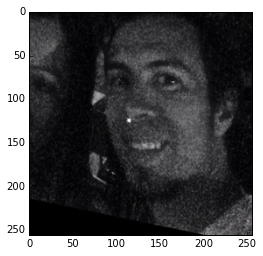

In [38]:
idx=780
plt.imshow(imread(Xv[idx]))
print yv[idx]

In [40]:
Counter(yt.tolist()).most_common()

[(4, 2302),
 (2, 1571),
 (3, 1263),
 (5, 1237),
 (1, 1076),
 (0, 1045),
 (7, 476),
 (6, 370)]

In [41]:
Counter(yv.tolist()).most_common()

[(4, 1646),
 (0, 960),
 (5, 554),
 (1, 494),
 (6, 219),
 (2, 213),
 (3, 152),
 (7, 139)]

In [46]:
imread("tmp/black-and-white-tips.jpg").shape

(211, 350, 3)

--------

In [5]:
import numpy as np
from scipy.stats import norm

Test soft labelling trick

In [64]:
y = np.asarray([[0,0,1,0,0],[1,0,0,0,0]],dtype="float32")
y

array([[ 0.,  0.,  1.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.]], dtype=float32)

In [56]:
np.argmax(y)

2

In [60]:
def one_hot_to_soft(y, sigma=1.0):
    y_softs = np.zeros(y.shape)
    for i in range(y.shape[0]):
        this_y = np.zeros(y.shape[1])
        for j in range(y.shape[1]):
            this_y[j] = norm.pdf(j, np.argmax(y[i]), sigma)
        y_softs[i] = this_y
        y_softs[i] = y_softs[i] / np.sum(y_softs[i])
    return y_softs


In [66]:
one_hot_to_soft(y,1).tolist()

[[0.054488684549642945,
  0.24420134200323335,
  0.40261994689424746,
  0.24420134200323335,
  0.054488684549642945],
 [0.5703496647219384,
  0.34593455841067655,
  0.07718843341905063,
  0.006336012450983673,
  0.000191330997350938]]

In [68]:
np.sum(one_hot_to_soft(y,1),axis=1)

array([ 1.,  1.])